# Try lots of models, features

**Mobile Price Classification**
> classify mobile price range

<a id="Import_libraries"></a>
# Import libraries

In [42]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

In [43]:
# Show plots in jupyter lab
%matplotlib inline 

<a id="Load_data"></a>
# Load data

In [44]:
df_org = pd.read_csv("/home/tweet/dataset/mobile_price/train.csv")
df = df_org.copy()

<a id="3"></a>
# Look at data and Data cleansing

In [45]:
print(df.shape)

(2000, 21)


> Rows: 2000<br>
Columns: 21

In [46]:
pd.set_option('display.max_columns', None)
df.head(10)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   
5           1859     0          0.5         1   3       0          22    0.7   
6           1821     0          1.7         0   4       1          10    0.8   
7           1954     0          0.5         1   0       0          24    0.8   
8           1445     1          0.5         0   0       0          53    0.7   
9            509     1          0.6         1   2       1           9    0.1   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   
5        164        1   7       1004      1654  1067    17     1         10   
6        139        8  10        381      1018  3220    13     8         18   
7        187        4   0        512      1149   700    16     3          5   
8        174        7  14        386       836  1099    17     1         20   
9         93        5  15       1137      1224   513    19    10         12   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            1  
1        1             1     0            2  
2        1             1     0            2  
3        1             0     0            2  
4        1             1     0            1  
5        1             0     0            1  
6        1             0     1            3  
7        1             1     1            0  
8        1             0     0            0  
9        1             0     0            0

# Make price range 0 and 1

In [47]:
def filter(x):
    if x > 1:
        x = 1
        return x
    else:
        return 0

In [48]:
df.price_range = df.price_range.apply(filter)

In [49]:
df.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            0  
1        1             1     0            1  
2        1             1     0            1

In [50]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

> All columns are usefull

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

> Types are ok

In [52]:
df.duplicated().sum()

0

In [53]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

> there is no Null item 

In [54]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      0.521500    32.046500     0.501750   140.249000     4.520500   
std       0.499662    18.145715     0.288416    35.399655     2.287837   
min       0.000000     2.000000     0.100000    80.000000     1.000000   
25%       0.000000    16.000000     0.200000   109.000000     3.000000   
50%       1.000000    32.000000     0.500000   141.000000     4.000000   
75%       1.000000    48.000000     0.800000   170.000000     7.000000   
max       1.000000    64.000000     1.000000   200.000000     8.000000   

                pc    px_height     px_width          ram         sc_h  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean      9.916500   645.108000  1251.515500  2124.213000    12.306500   
std       6.064315   443.780811   432.199447  1084.732044     4.213245   
min       0.000000     0.000000   500.000000   256.000000     5.000000   
25%       5.000000   282.750000   874.750000  1207.500000     9.000000   
50%      10.000000   564.000000  1247.000000  2146.500000    12.000000   
75%      15.000000   947.250000  1633.000000  3064.500000    16.000000   
max      20.000000  1960.000000  1998.000000  3998.000000    19.000000   

              sc_w    talk_time      three_g  touch_screen         wifi  \
count  2000.000000  2000.000000  2000.000000   2000.000000  2000.000000   
mean      5.767000    11.011000     0.761500      0.503000     0.507000   
std       4.356398     5.463955     0.426273      0.500116     0.500076   
min       0.000000     2.000000     0.000000      0.000000     0.000000   
25%       2.000000     6.000000     1.000000      0.000000     0.000000   
50%       5.000000    11.000000     1.000000      1.000000     1.000000   
75%       9.000000    16.000000     1.000000      1.000000     1.000000   
max      18.000000    20.000000     1.000000      1.000000     1.000000   

       price_range  
count  2000.000000  
mean      0.500000  
std       0.500125  
min       0.000000  
25%       0.000000  
50%       0.500000  
75%       1.000000  
max       1.000000

In [55]:
# Return unbiased kurtosis over requested axis using Fisher's definition of kurtosis (kurtosis of normal == 0.0).
# The result is normalized by N-1
kurt = df.kurt()[:]
kurt

battery_power   -1.224144
blue            -2.001602
clock_speed     -1.323417
dual_sim        -2.000555
fc               0.277076
four_g          -1.994575
int_memory      -1.216074
m_dep           -1.274349
mobile_wt       -1.210376
n_cores         -1.229750
pc              -1.171499
px_height       -0.315865
px_width        -1.186005
ram             -1.191913
sc_h            -1.190791
sc_w            -0.389523
talk_time       -1.218591
three_g         -0.492161
touch_screen    -2.001859
wifi            -2.001217
price_range     -2.002003
dtype: float64

> It's ok 

<a id='Data_Visualization'></a>
# Data Visualization

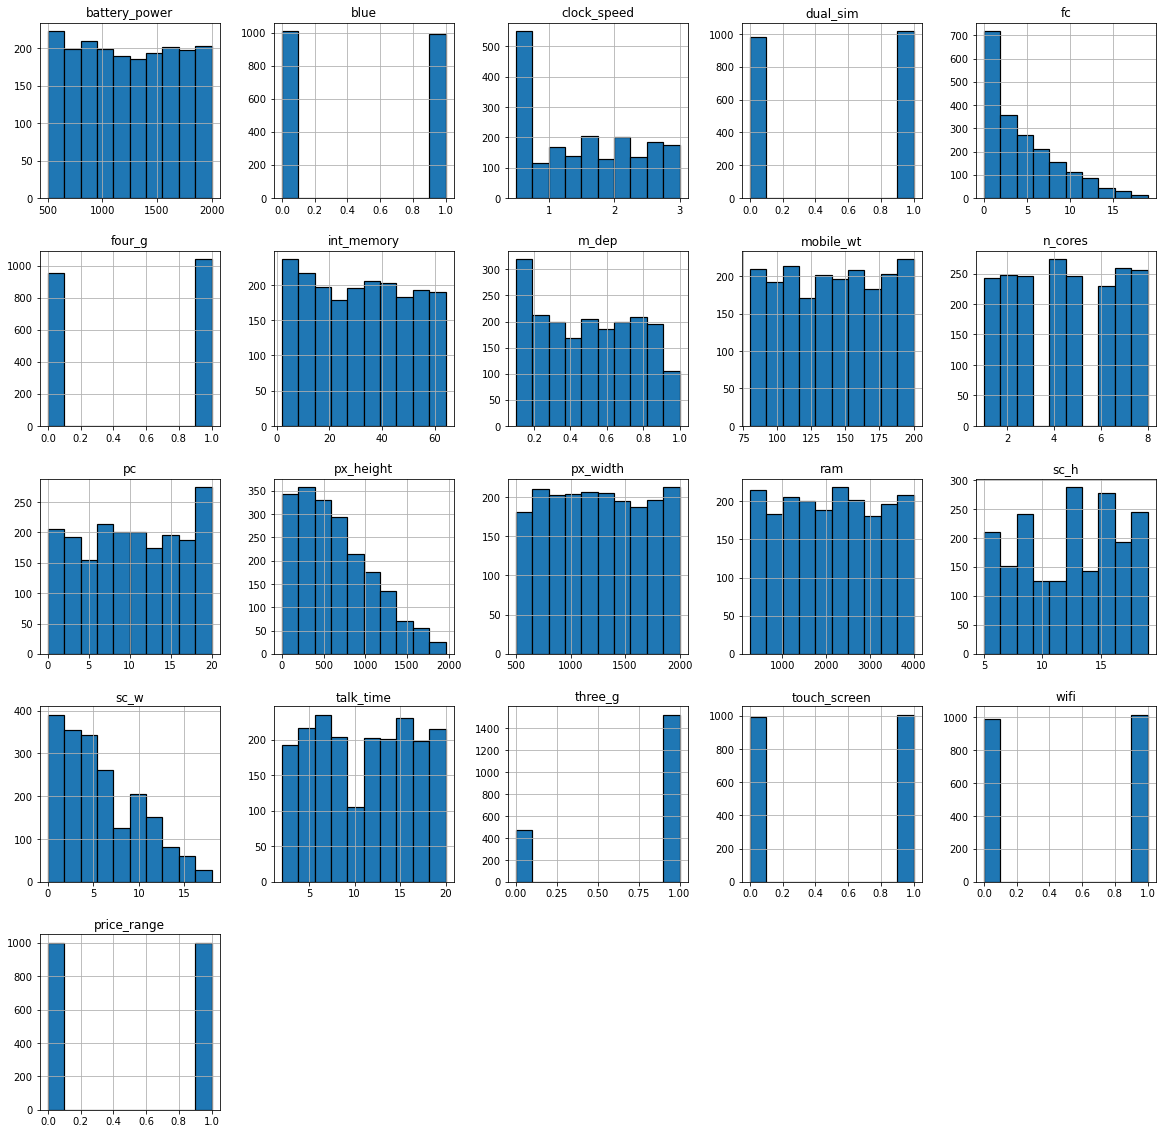

In [56]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
plt.show()

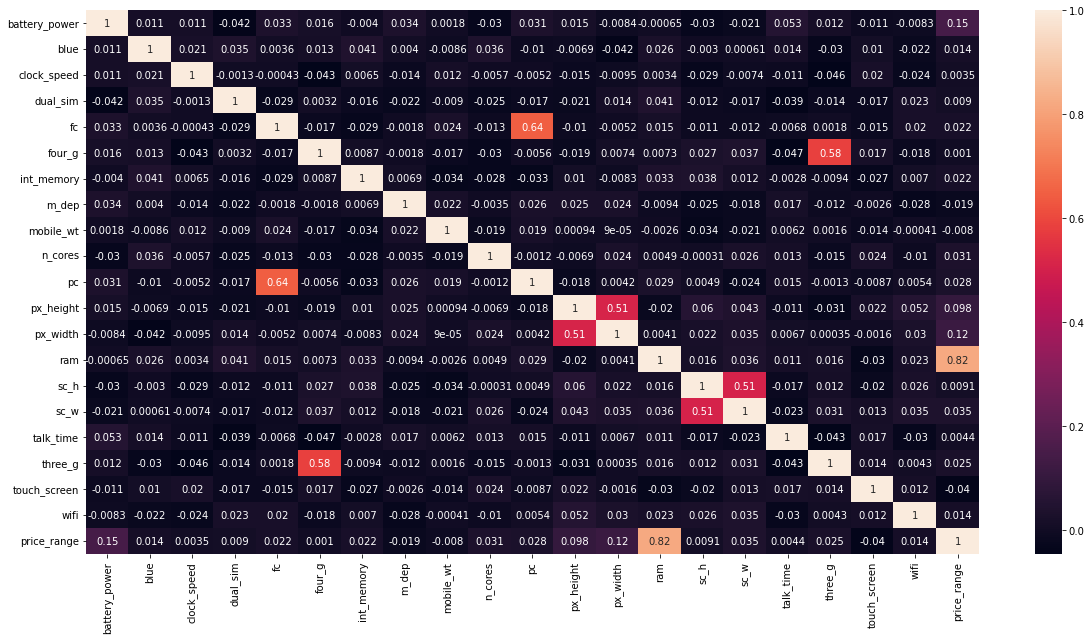

In [57]:
# correlation matrix
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True)
plt.show()

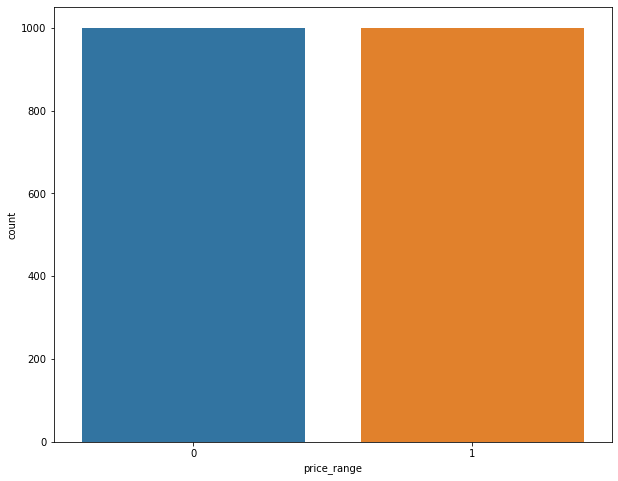

In [58]:
plt.figure(figsize=(10,8))
ax = sns.countplot(x = df["price_range"])

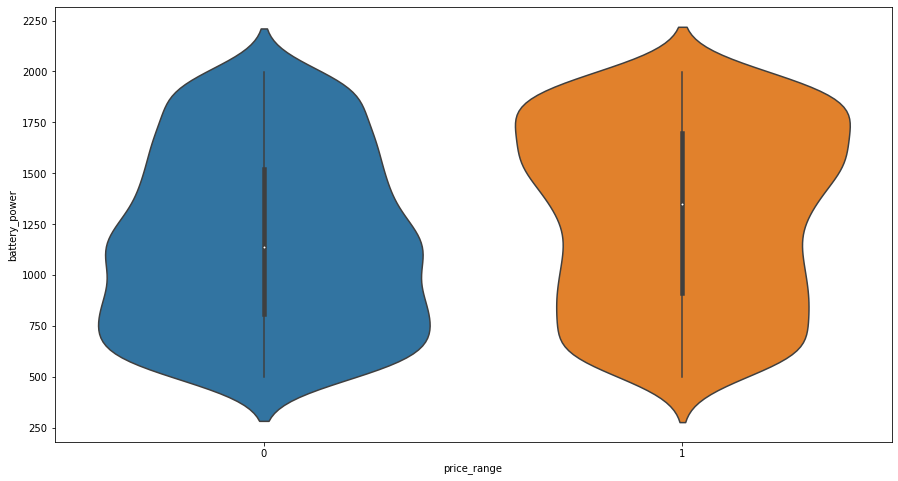

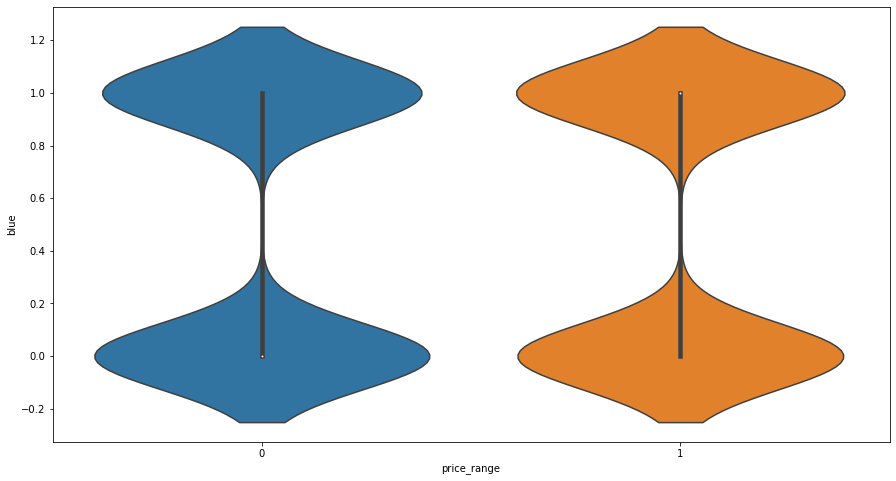

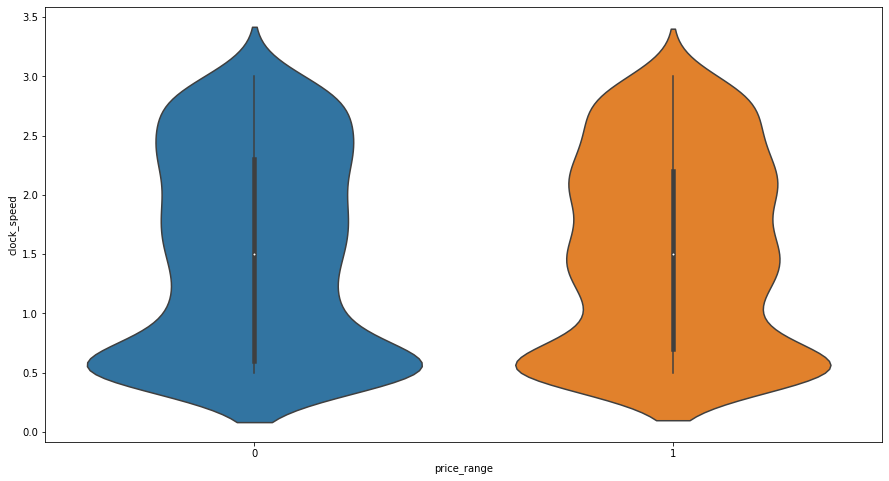

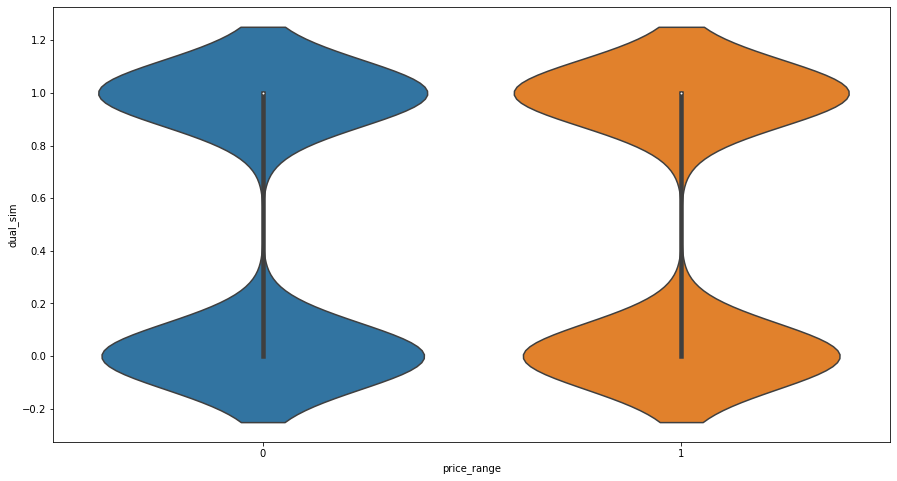

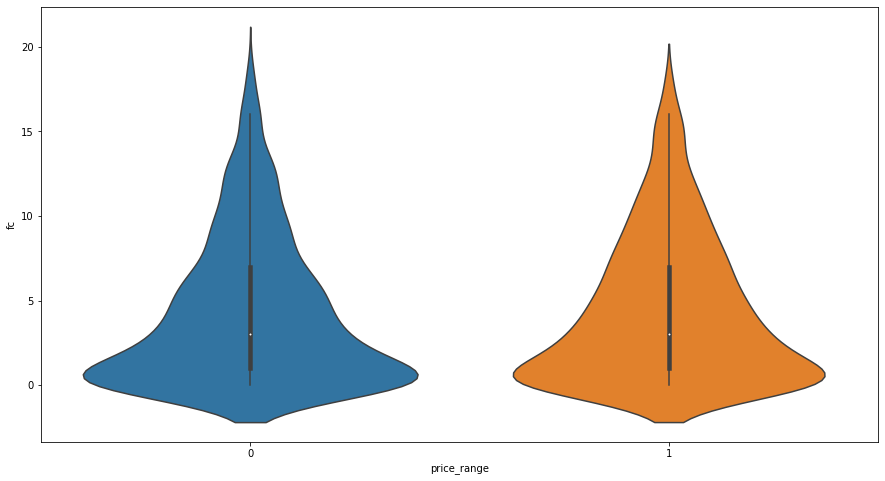

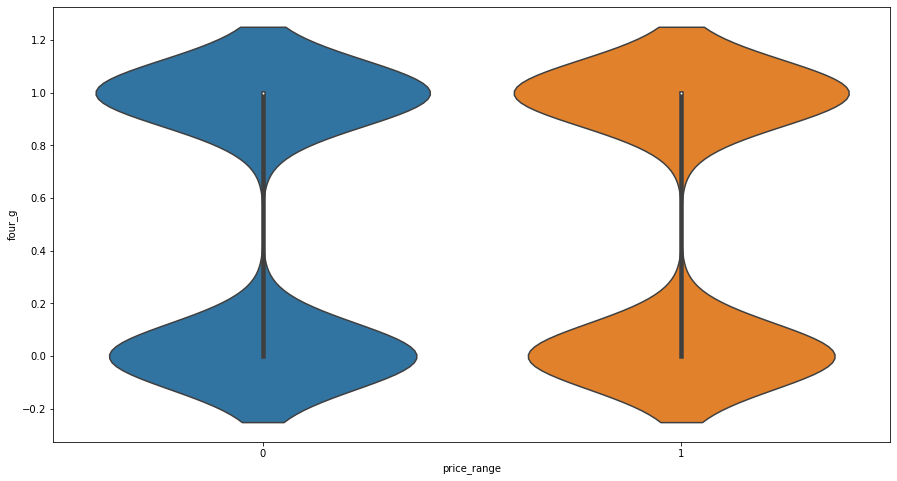

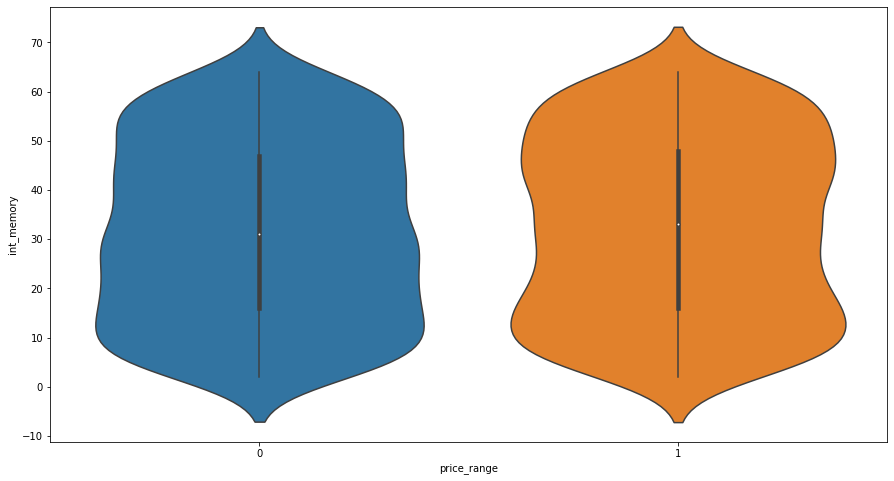

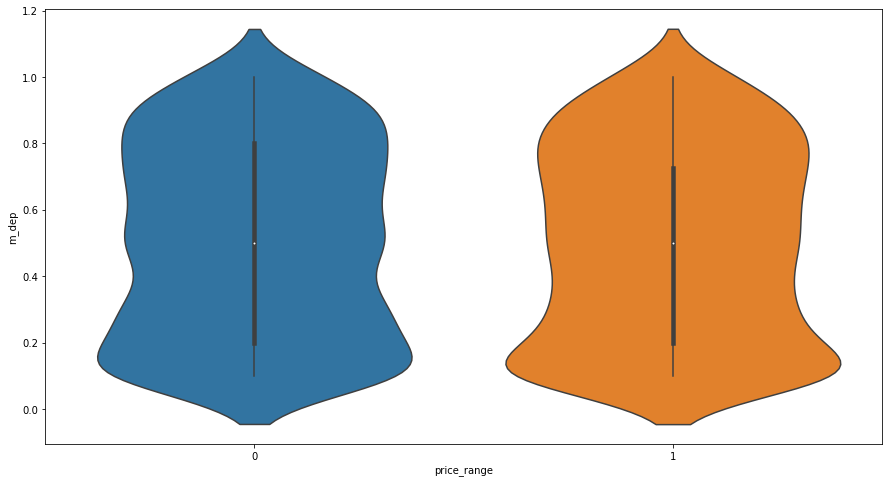

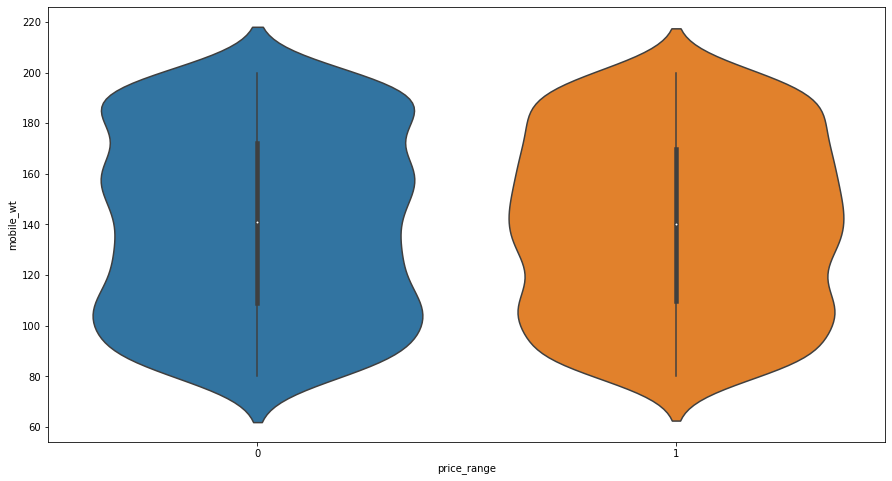

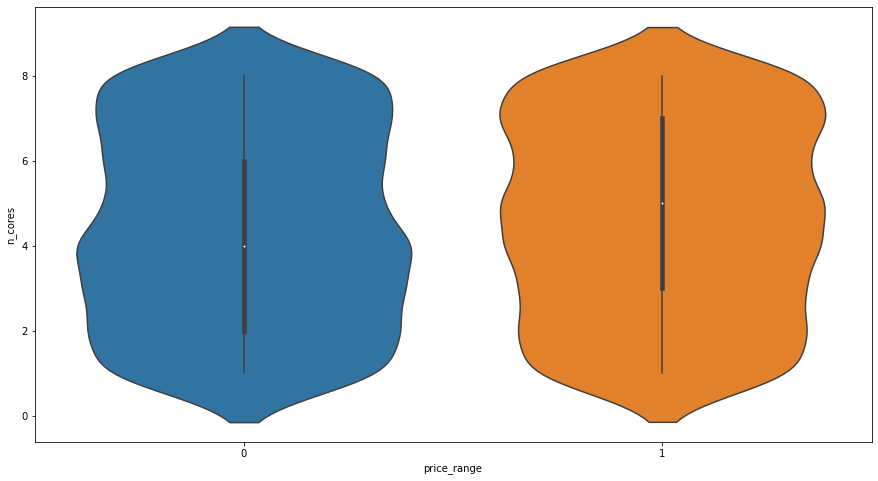

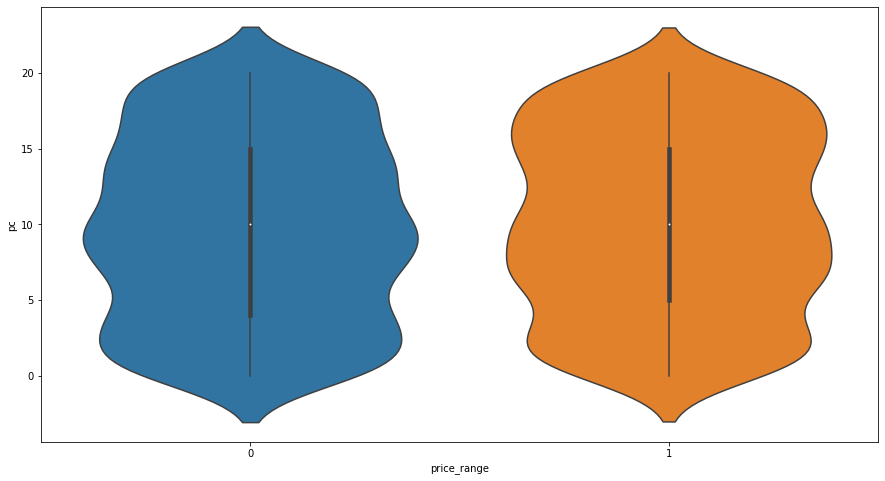

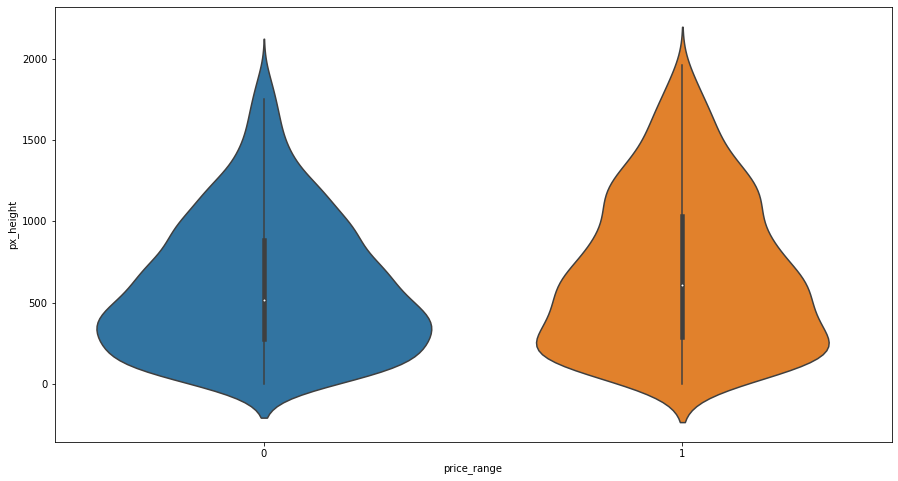

In [59]:
for col in df.columns[:12]:
    plt.figure(figsize=(15,8))
    sns.violinplot(x="price_range", y=col, data=df)

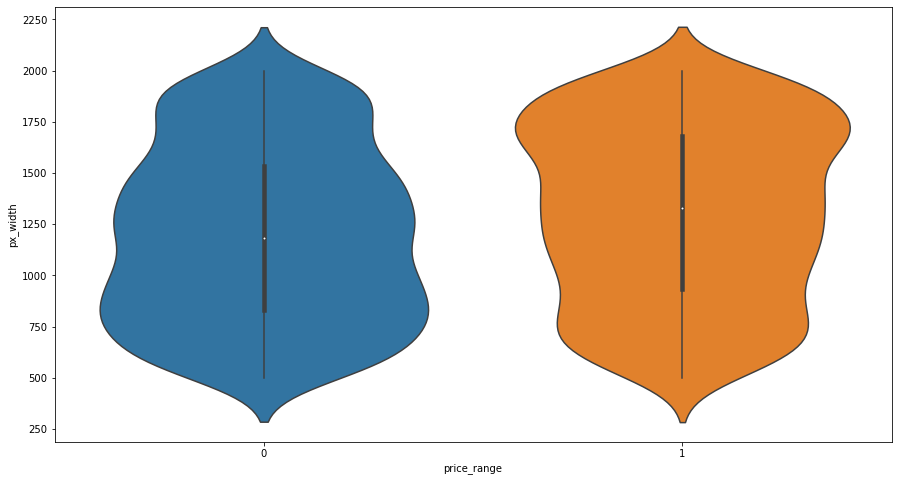

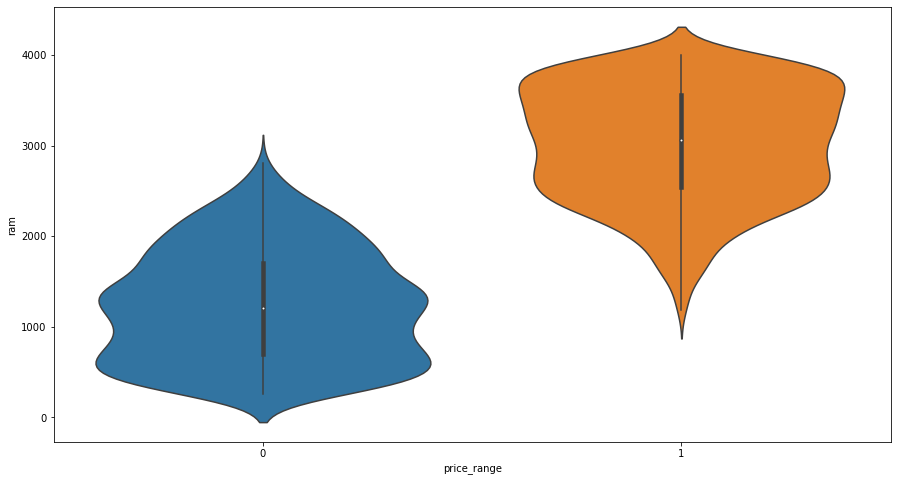

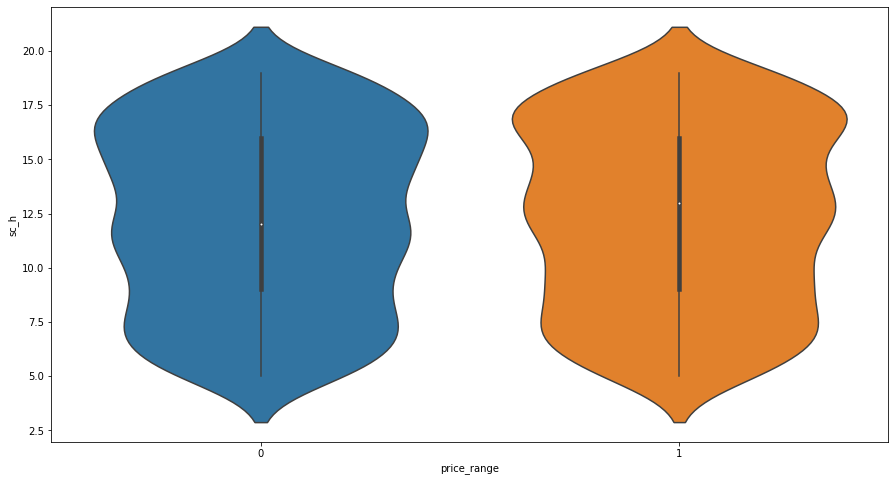

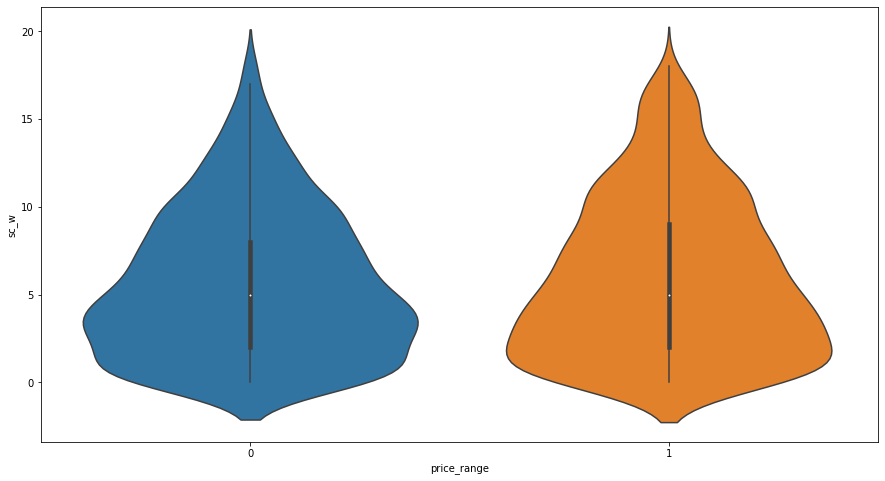

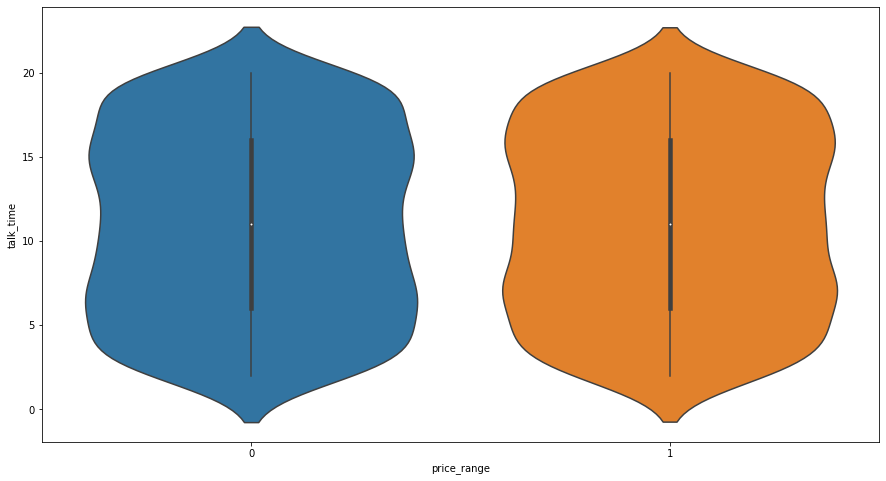

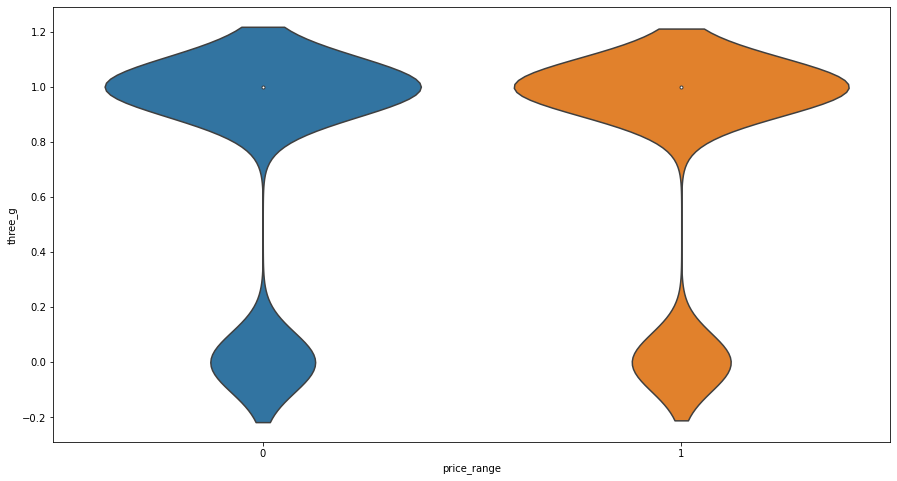

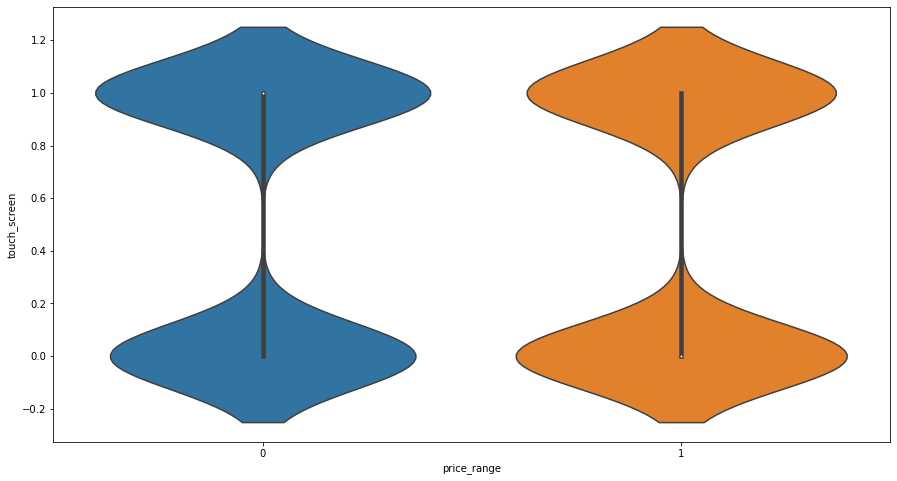

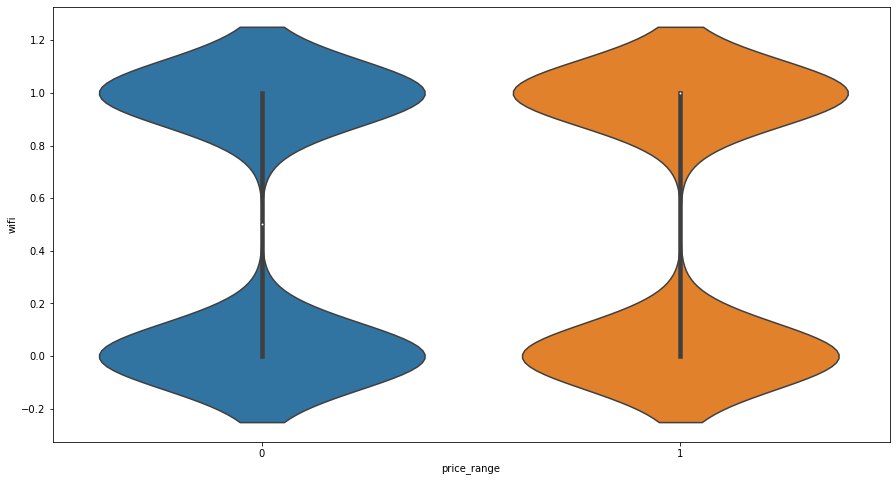

In [60]:
for col in df.columns[12:-1]:
    plt.figure(figsize=(15,8))
    sns.violinplot(x="price_range", y=col, data=df)

# Preprocessing

In [61]:
df_copy = df.copy()

In [62]:
y = df_copy.pop('price_range')
X = df_copy

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [64]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(1600, 20)
(1600,)
(400, 20)
(1600,)


In [65]:
y_train.head()

582     0
159     0
1827    1
318     0
708     1
Name: price_range, dtype: int64

In [66]:
X_train.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
582            1232     0          2.9         1   1       1          24   
159            1840     0          0.5         1  12       0          34   
1827           1692     0          2.1         0   4       1           2   

      m_dep  mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  \
582     0.3        169        5  17        361       809  1257    16    10   
159     0.7        142        1  16        311      1545  1078     8     0   
1827    0.9        106        1  17       1899      1904  3779     9     3   

      talk_time  three_g  touch_screen  wifi  
582          16        1             0     0  
159          10        0             0     0  
1827          7        1             1     1

In [67]:
scaler_1 = StandardScaler()

In [68]:
fitter_1 = scaler_1.fit(X_train)

In [69]:
X_train = fitter_1.transform(X_train)
X_test = fitter_1.transform(X_test)

In [70]:
X_train = pd.DataFrame(data=X_train, columns=X.columns)
X_test = pd.DataFrame(data=X_test, columns=X.columns)
# y_train = pd.DataFrame(data=y_train, columns=['price'])
# y_test = pd.DataFrame(data=y_test, columns=['price'])

In [71]:
X_train.head(3)

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0      -0.001608 -0.965592     1.671035  0.983880 -0.748114  0.976525   
1       1.374075 -0.965592    -1.270550  0.983880  1.810037 -1.024039   
2       1.039205 -0.965592     0.690506 -1.016384 -0.050436  0.976525   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0   -0.430667 -0.692543   0.852842  0.216380  1.183752  -0.660982 -1.042159   
1    0.119443  0.693843   0.084708 -1.543255  1.018941  -0.773314  0.655005   
2   -1.640908  1.387036  -0.939471 -1.543255  1.183752   2.794355  1.482833   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0 -0.786095  0.882404  0.951809   0.911171  0.564840     -0.986343 -1.025320  
1 -0.952286 -1.032614 -1.324225  -0.183466 -1.770414     -0.986343 -1.025320  
2  1.555428 -0.793236 -0.641415  -0.730784  0.564840      1.013846  0.975305

In [72]:
y_train.head(3)

582     0
159     0
1827    1
Name: price_range, dtype: int64

In [73]:
X_test.head()

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0       0.500697  1.035635    -1.270550  0.983880 -0.748114 -1.024039   
1      -0.318377  1.035635    -1.270550  0.983880  1.344919 -1.024039   
2       0.659082  1.035635     0.322808  0.983880 -0.980673 -1.024039   
3       1.299408  1.035635     0.690506 -1.016384 -0.515555 -1.024039   
4      -0.331953  1.035635     0.200242  0.983880 -0.980673  0.976525   

   int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0    0.119443  0.693843  -1.593807 -0.223529 -1.123596  -0.910359 -0.525631   
1   -1.145809  0.000650   0.795943 -0.663437  0.689320  -0.420591 -1.590970   
2   -1.200820  0.347246   0.995089 -0.223529 -1.453217  -1.126037 -1.639394   
3    0.944607  1.040440  -0.398932 -1.543255  0.030078  -0.714901  0.283750   
4    0.614541 -1.039140  -0.797224  0.656289 -1.453217  -1.346208 -0.255837   

        ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0  1.221190 -1.271991 -0.186208  -1.095663  0.564840      1.013846 -1.025320  
1 -1.268884  0.403650 -0.413811  -0.001026 -1.770414      1.013846 -1.025320  
2  0.533217  0.882404 -0.186208   0.363853  0.564840     -0.986343  0.975305  
3 -0.183538  1.121782  1.634619   0.363853 -1.770414      1.013846  0.975305  
4  1.096779 -0.314482 -0.186208   1.093610  0.564840      1.013846 -1.025320

<a id="Model_Function"></a>
# Model function

In [74]:
def LR(X_train, y_train, X_test, y_test, i):
    LR = LogisticRegression()
    LR = LR.fit(X_train, y_train)
    yhat = LR.predict(X_test)
    acc = accuracy_score(y_test, yhat)
    fpr, tpr, thresholds = metrics.roc_curve(y_test, yhat)
    acc_auc = metrics.auc(fpr, tpr)
    if isinstance(i, int):
        #Forward, Backward selection we need acc_auc
        if i == 22:
            return (acc_auc)
        #predict test data we need model
        elif i == 23:
            return LR
    #all features ,pca
    else:
        message = f"Accuracy of sklearn's Logistic Regression Classifier with {i}: {acc}, acc_auc: {acc_auc}"
        return (message, yhat)

<a id="Fauture_selection"></a>
# Fauture selection 

<a id="With_all_feautres"></a>
# With all feautres 

In [75]:
message, yhat = LR(X_train, y_train, X_test, y_test, "all_features")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with all_features: 0.985, acc_auc: 0.9849363561045417
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       187
           1       0.99      0.99      0.99       213

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



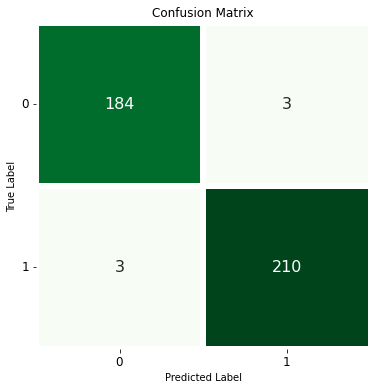

In [76]:
cm = confusion_matrix(y_test, yhat)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# Forward selection

In [77]:
def forward(X_train, y_train, X_test, y_test, best_cols, all_cols):
    init_acc_auc = 0.50
    for col in all_cols:
        best_cols.append(col)
        X_train_f = pd.DataFrame(data=X_train, columns=best_cols)
        X_test_f = pd.DataFrame(data=X_test, columns=best_cols)
        acc_auc = LR(X_train_f, y_train, X_test_f, y_test, i=22)
        if acc_auc > init_acc_auc:
            init_acc_auc = acc_auc
        else:
            best_cols.pop()
    return(f'result forward selection=> best columns: {best_cols} with auc: {init_acc_auc}', best_cols)

In [78]:
best_cols, all_cols = [], X.columns.to_list()
forward_col, best_cols_f = forward(X_train, y_train, X_test, y_test, best_cols, all_cols)
print(forward_col)

result forward selection=> best columns: ['battery_power', 'blue', 'clock_speed', 'n_cores', 'px_width', 'ram'] with auc: 0.9725465090005272


In [79]:
X_train_f = pd.DataFrame(data=X_train, columns=best_cols_f)
X_test_f = pd.DataFrame(data=X_test, columns=best_cols_f)
message, yhat = LR(X_train_f, y_train, X_test_f, y_test, "forward selection")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with forward selection: 0.9725, acc_auc: 0.9725465090005272
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       187
           1       0.98      0.97      0.97       213

    accuracy                           0.97       400
   macro avg       0.97      0.97      0.97       400
weighted avg       0.97      0.97      0.97       400



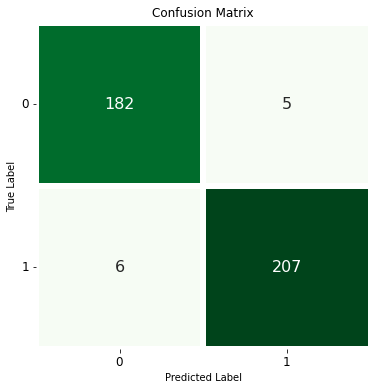

In [80]:
cm = confusion_matrix(y_test, yhat)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# Backward selection

In [81]:
def backward(X_train, y_train, X_test, y_test, all_cols):
    init_acc_auc = LR(X_train, y_train, X_test, y_test, i=22)
    for i in range(len(all_cols)-1):
        col = all_cols.pop(0)
        X_train_b = pd.DataFrame(data=X_train, columns=all_cols)
        X_test_b = pd.DataFrame(data=X_test, columns=all_cols)
        acc_auc = LR(X_train_b, y_train, X_test_b, y_test, i=22)
        if acc_auc > init_acc_auc:
            init_acc_auc = acc_auc
        else:
            all_cols.append(col)
    return(f'result backward selection=> best columns: {all_cols} with auc: {init_acc_auc}', all_cols)

In [82]:
all_cols = X.columns.to_list()
backward_col, best_cols_b = backward(X_train, y_train, X_test, y_test, all_cols)
print(backward_col)

result backward selection=> best columns: ['wifi', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g'] with auc: 0.986957394993849


In [83]:
X_train_b = pd.DataFrame(data=X_train, columns=best_cols_b)
X_test_b = pd.DataFrame(data=X_test, columns=best_cols_b)
message, yhat = LR(X_train_b, y_train, X_test_b, y_test, "backward selection")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with backward selection: 0.9875, acc_auc: 0.986957394993849
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       187
           1       0.98      1.00      0.99       213

    accuracy                           0.99       400
   macro avg       0.99      0.99      0.99       400
weighted avg       0.99      0.99      0.99       400



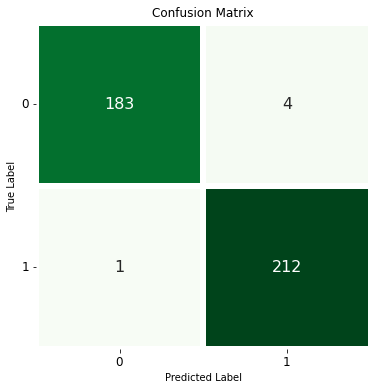

In [84]:
cm = confusion_matrix(y_test, yhat)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

<a id="PCA"></a>
# PCA

In [85]:
# forward selection has 6 features
pca = PCA(n_components=6)
pca.fit(X_train)
pca_train = pd.DataFrame()
pca_test = pd.DataFrame()
pca_train = pd.DataFrame(
    data = pca.transform(X_train), 
    columns =[
    "pca"+str(6) for i in range(1, 6+1)
])
pca_test = pd.DataFrame(
    data = pca.transform(X_test), 
    columns =[
    "pca"+str(6) for i in range(1, 6+1)
])

In [86]:
pca_train

pca6      pca6      pca6      pca6      pca6      pca6
0    -0.031258  0.835038 -0.662678 -1.489764 -0.287070  0.787390
1     2.798196 -0.985427  0.347982  1.183628  0.348749 -0.080288
2    -0.259485  1.528353  1.055042  3.255823 -0.303964 -0.277343
3    -0.156756  1.071642 -1.471070 -2.232996  0.253066  0.482911
4    -0.120198 -0.924005  2.976764  0.697115  1.462110 -0.345744
...        ...       ...       ...       ...       ...       ...
1595  2.233760  0.281469 -0.549018 -0.532175 -0.737704 -1.045662
1596 -0.442333  1.756488  0.515576 -0.271527  0.778629  0.146279
1597 -1.541285 -2.084934  1.952641  0.302850  1.778409 -0.869768
1598 -0.695399 -0.424617  0.267241  0.426961  0.281725  2.031654
1599  1.880521  2.108552 -0.634606 -0.159185  1.680061  0.414397

[1600 rows x 6 columns]

In [87]:
message, yhat = LR(pca_train, y_train, pca_test, y_test, "pca 6")
print(message)
print(classification_report(y_test, yhat))

Accuracy of sklearn's Logistic Regression Classifier with pca 6: 0.6975, acc_auc: 0.6983379779568677
              precision    recall  f1-score   support

           0       0.67      0.71      0.69       187
           1       0.73      0.69      0.71       213

    accuracy                           0.70       400
   macro avg       0.70      0.70      0.70       400
weighted avg       0.70      0.70      0.70       400



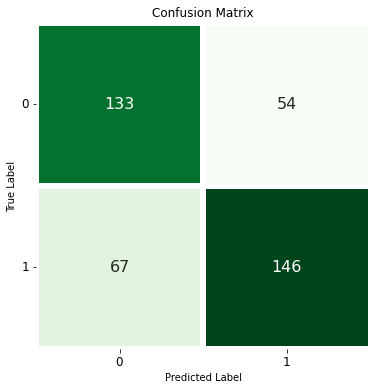

In [88]:
cm = confusion_matrix(y_test, yhat)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True,cmap="Greens", fmt= '.0f',
            ax=ax,linewidths = 5, cbar = False,annot_kws={"size": 16})
plt.xlabel("Predicted Label")
plt.xticks(size = 12)
plt.yticks(size = 12, rotation = 0)
plt.ylabel("True Label")
plt.title("Confusion Matrix", size = 12)
plt.show()

# Feature engineering

In [89]:
df.battery_power.describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

# Binning

In [90]:
df_bin = df.copy()

In [91]:
def filter(x):
    if x >= 1500:
        return 0.9
    elif 1000 <= x < 1500:
        return 0.6
    else:
        return 0.3

In [92]:
df_bin.battery_power = df_bin.battery_power.apply(filter)

In [93]:
df_bin.battery_power.describe()

count    2000.000000
mean        0.595050
std         0.247126
min         0.300000
25%         0.300000
50%         0.600000
75%         0.900000
max         0.900000
Name: battery_power, dtype: float64

# One hot encoding

In [94]:
df.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  
0        0             0     1            0  
1        1             1     0            1  
2        1             1     0            1

In [95]:
df_ohe = df.copy()

In [96]:
for i in df_ohe.index:
    if df_ohe.loc[i, 'blue'] == 0:
        df_ohe.loc[i, 'notblue'] = 1
    else:
        df_ohe.loc[i, 'notblue'] = 0
for i in df_ohe.index:
    if df_ohe.loc[i, 'dual_sim'] == 0:
        df_ohe.loc[i, 'notdual_sim'] = 1
    else:
        df_ohe.loc[i, 'notdual_sim'] = 0
for i in df_ohe.index:
    if df_ohe.loc[i, 'four_g'] == 0:
        df_ohe.loc[i, 'notfour_g'] = 1
    else:
        df_ohe.loc[i, 'notfour_g'] = 0
        
df_ohe.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  price_range  notblue  notdual_sim  notfour_g  
0        0             0     1            0      1.0          1.0        1.0  
1        1             1     0            1      0.0          0.0        0.0  
2        1             1     0            1      0.0          0.0        0.0

In [97]:
df_ohe.drop(columns=['price_range'], axis=1, inplace=True)
df_ohe['price_range'] = df.price_range
df_ohe.head(3)

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   

   three_g  touch_screen  wifi  notblue  notdual_sim  notfour_g  price_range  
0        0             0     1      1.0          1.0        1.0            0  
1        1             1     0      0.0          0.0        0.0            1  
2        1             1     0      0.0          0.0        0.0            1

# Transofrm

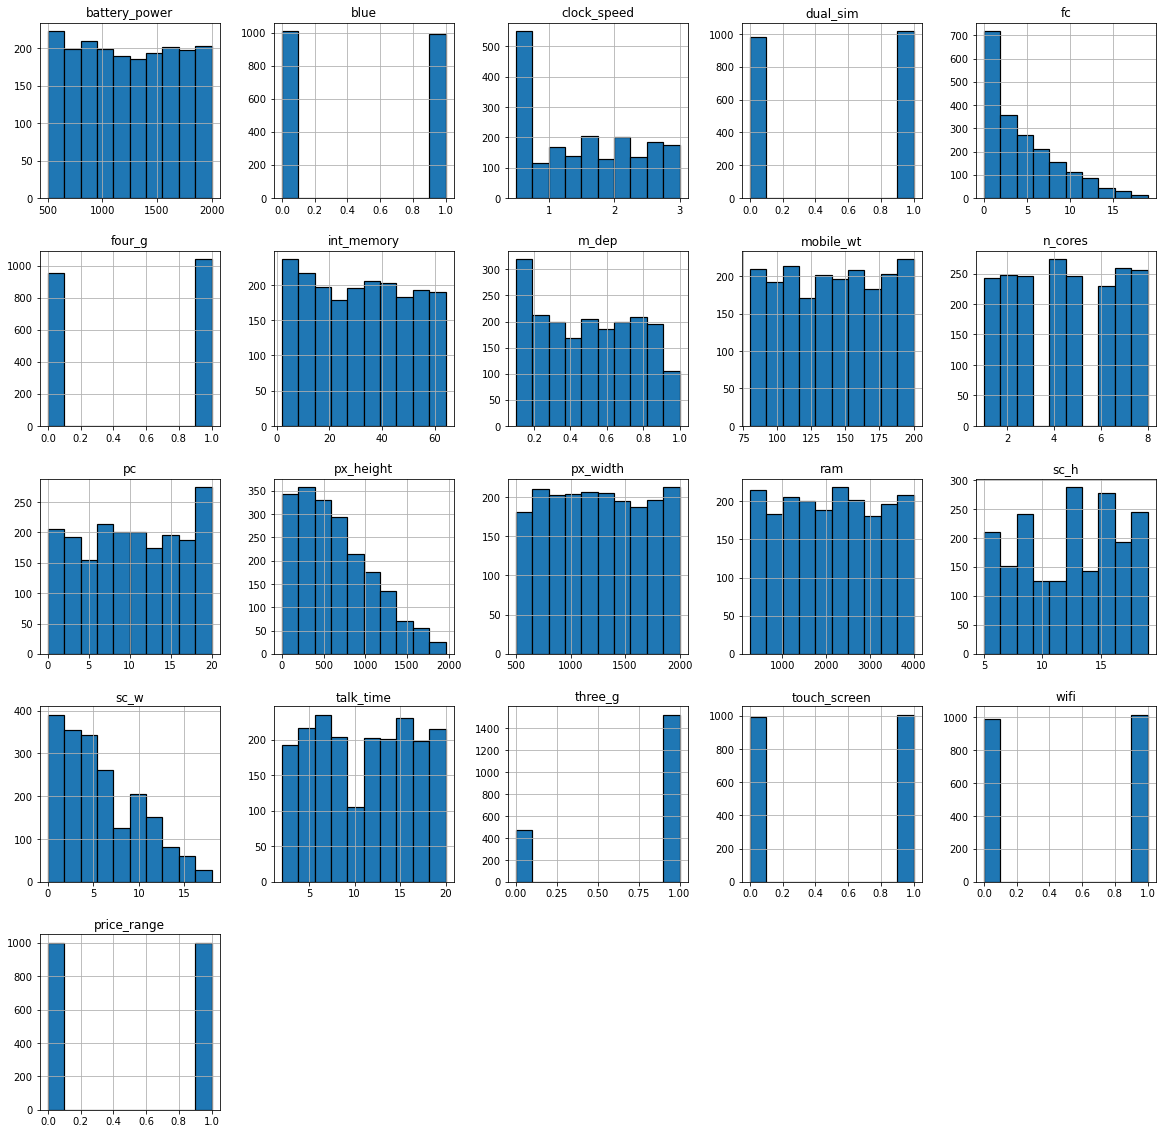

In [98]:
# Visualizing the distribution for every "feature"
df.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
plt.show()

In [99]:
df_tra = df.copy()

In [100]:
def filter(x):
    if x > 0:
        return np.log(x)
    else:
        return x

In [101]:
df_tra.sc_w = df_tra.sc_w.apply(filter)
df_tra.fc = df_tra.fc.apply(filter)

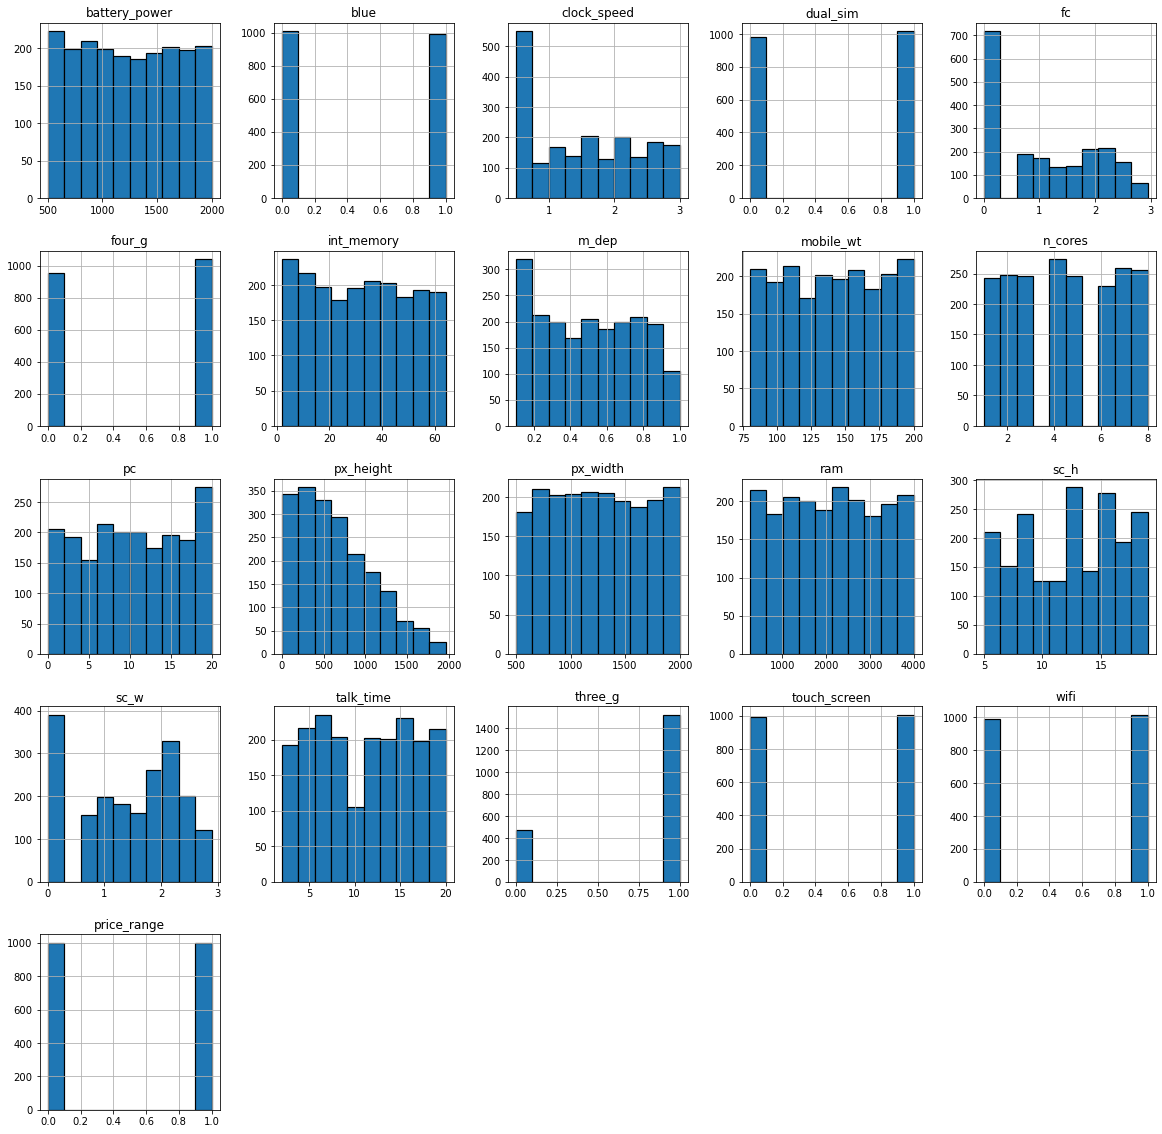

In [102]:
# Visualizing the distribution for every "feature"
df_tra.hist(edgecolor="black", linewidth=1.2, figsize=(20, 20))
plt.show()

# Area

In [103]:
df_area = df.copy()

In [104]:
df_area['sc_area'] = df['sc_h'] * df['sc_w']
df_area['px_area'] = df['px_height'] * df['px_width']
df_area.drop(columns=['price_range'], axis=1, inplace=True)
df_area['price_range'] = df.price_range

In [105]:
df_area.head()

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  sc_area  px_area  price_range  
0        0             0     1       63    15120            0  
1        1             1     0       51  1799140            1  
2        1             1     0       22  2167308            1  
3        1             0     0      128  2171776            1  
4        1             1     0       16  1464096            0

# ALL

In [106]:
df_all = df.copy()

In [107]:
def filter(x):
    if x >= 1500:
        return 0.9
    elif 1000 <= x < 1500:
        return 0.6
    else:
        return 0.3

In [108]:
df_all.battery_power = df_all.battery_power.apply(filter)

In [109]:
def filter(x):
    if x > 0:
        return np.log(x)
    else:
        return x

In [110]:
df_all.sc_w = df_all.sc_w.apply(filter)
df_all.fc = df_all.fc.apply(filter)

In [111]:
for i in df_all.index:
    if df_all.loc[i, 'blue'] == 0:
        df_all.loc[i, 'notblue'] = 1
    else:
        df_all.loc[i, 'notblue'] = 0

In [112]:
df_all['sc_area'] = df['sc_h'] * df['sc_w']
df_all['px_area'] = df['px_height'] * df['px_width']
df_all.drop(columns=['price_range'], axis=1, inplace=True)
df_all['price_range'] = df.price_range

# Compare thease data

In [113]:
for i in [[df_bin, 'bininng'], [df_ohe, 'ohe hot encoding'], [df_tra, 'log transform'], [df_area, 'area'],[df_all, 'all']]:
    data = i[0].copy()
    y = data.pop('price_range')
    X = data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    scaler = StandardScaler()
    fit_X = scaler.fit(X_train)
    X_train = fit_X.transform(X_train)
    X_test = fit_X.transform(X_test)
    X_train = pd.DataFrame(data=X_train, columns=X.columns)
    X_test = pd.DataFrame(data=X_test, columns=X.columns)
    message, yhat = LR(X_train, y_train, X_test, y_test, i[1])
    print(message)

Accuracy of sklearn's Logistic Regression Classifier with bininng: 0.9825, acc_auc: 0.9825889382641662
Accuracy of sklearn's Logistic Regression Classifier with ohe hot encoding: 0.985, acc_auc: 0.9849363561045417
Accuracy of sklearn's Logistic Regression Classifier with log transform: 0.9825, acc_auc: 0.9822625593130979
Accuracy of sklearn's Logistic Regression Classifier with area: 0.985, acc_auc: 0.9849363561045417
Accuracy of sklearn's Logistic Regression Classifier with all: 0.9825, acc_auc: 0.9825889382641662


# Crossvalidation, Bootstrapping

**Crossvalidation**
> Cross-Validation is a statistical method of evaluating and comparing learning algorithms by dividing data into two segments: one used to learn or train a model and the other used to validate the model.

**Bootstrapping**
> Bootstrapping is a statistical procedure that resamples a single dataset to create many simulated samples.

**Why Crossvalidation**
> It is used to protect against overfitting in a predictive model, particularly in a case where the amount of data may be limited.<br>
Advantages of cross-validation: More accurate estimate of out-of-sample accuracy. More “efficient” use of data as every observation is used for both training and testing.

**Why Bootstrapping**
> It helps in avoiding overfitting and improves the stability of machine learning algorithms.<br>
A great advantage of bootstrap is its simplicity. It is a straightforward way to derive estimates of standard errors and confidence intervals for complex estimators of the distribution, such as percentile points, proportions, odds ratio, and correlation coefficients.

**When Bootstrapping, Crossvalidation**
> We use Bootsrap when we one to estimate parameteters.<br>
We use Crossvalodation for our model's score.

**5x2 cross validation**
> 5x2cv refer to a 5 repetition of a 2-fold. do a 2-fold (50/50 split between train and test), repeat it 4 more times. The 5x2cv was for comparing supervised classification learning algorithms by Dietterich as a way of obtaining not only a good estimate of the generalisation error but also a good estimate of the variance of that error (in order to perform statistical tests). [code on kaggle](https://www.kaggle.com/code/ogrellier/parameter-tuning-5-x-2-fold-cv-statistical-test/notebook) 

# Decision-tree, Pruning

**CART, ID3**
> CART is a classification algorithm for building a decision tree based on Gini's impurity index as splitting criterion.<br>
 ID3 is a classification algorithm for building a decision tree based on Information Gain as splitting criterion. <br>

*Another difference:*<br>
The CART algorithm produces only binary Trees: non-leaf nodes always have two children. <br>
ID3 can produce Decision Trees with nodes having more than two children.

In [138]:
tree = DecisionTreeClassifier(criterion='gini', ccp_alpha=0, max_leaf_nodes=8, min_samples_split=4, max_depth=11)

In [139]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, max_depth=11, max_leaf_nodes=8,
                       min_samples_split=4)

In [140]:
y_pred_tree = tree.predict(X_test)

In [141]:
print('DecisionTreeRegressor: test', tree.score(X_train, y_train))
print('DecisionTreeRegressor R^2: test', metrics.r2_score(y_test, y_pred_tree))

DecisionTreeRegressor: test 0.961875
DecisionTreeRegressor R^2: test 0.7388968391453893


In [173]:
tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0, max_depth=11)

In [174]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0, criterion='entropy', max_depth=11)

In [175]:
y_pred_tree = tree.predict(X_test)

In [176]:
print('DecisionTreeRegressor: test', tree.score(X_train, y_train))
print('DecisionTreeRegressor R^2: test', metrics.r2_score(y_test, y_pred_tree))

DecisionTreeRegressor: test 1.0
DecisionTreeRegressor R^2: test 0.7489392684090281


**Pruning**
> Pruning is a data compression technique in machine learning and search algorithms that reduces the size of decision trees by removing sections of the tree that are non-critical and redundant to classify instances.<br>
> We use it because it can prevent overfitting<br>
    max_leaf_nodes. Reduce the number of leaf nodes.<br>
    min_samples_leaf. Restrict the size of sample leaf. Minimum sample size in terminal nodes can be fixed to 30, 100, 300 or 5% of total.<br>
    max_depth. Reduce the depth of the tree to build a generalized tree.<br>

In [194]:
tree = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0, max_depth=8, max_leaf_nodes=10, min_samples_leaf=30)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)
print('DecisionTreeRegressor: test', tree.score(X_train, y_train))
print('DecisionTreeRegressor R^2: test', metrics.r2_score(y_test, y_pred_tree))

DecisionTreeRegressor: test 0.95625
DecisionTreeRegressor R^2: test 0.6987271220908338


**Elbow method**
> We are looking for a trade of between bias and variance 
in this graph it looks to be 3 because after that we might have overfitting.

**Matthews Correlation Coefficient(MCC)**
>The MCC is in essence a correlation coefficient value between -1 and +1. A coefficient of +1 represents a perfect prediction, 0 an average random prediction and -1 an inverse prediction. The statistic is also known as the phi coefficient.<br>
MCC = (TP*TN – FP*FN) / √(TP+FP)(TP+FN)(TN+FP)(TN+FN)

# Random forest

In [195]:
random = RandomForestClassifier()

In [196]:
random.fit(X_train, y_train)

RandomForestClassifier()

In [197]:
y_pred_random = random.predict(X_test)

In [198]:
print('RandomForestClassifier: test', random.score(X_train, y_train))
print('RandomForestClassifier R^2: test', metrics.r2_score(y_test, y_pred_random))

RandomForestClassifier: test 1.0
RandomForestClassifier R^2: test 0.7589816976726671


# Bagging

In [199]:
bagging = BaggingClassifier()

In [200]:
bagging.fit(X_train, y_train)

BaggingClassifier()

In [201]:
y_pred_bagging = bagging.predict(X_test)

In [202]:
print('BaggingClassifier: test', bagging.score(X_train, y_train))
print('BaggingClassifier R^2: test', metrics.r2_score(y_test, y_pred_bagging))

BaggingClassifier: test 0.9975
BaggingClassifier R^2: test 0.8292787025181392


# Boosting

In [259]:
boosting = GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.08)

In [260]:
boosting.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0, learning_rate=0.08)

In [261]:
y_pred_boosting = boosting.predict(X_test)

In [262]:
print('GradientBoostingClassifier: test', boosting.score(X_train, y_train))
print('GradientBoostingClassifier R^2: test', metrics.r2_score(y_test, y_pred_boosting))

GradientBoostingClassifier: test 0.996875
GradientBoostingClassifier R^2: test 0.8694484195726946


# KNN

In [203]:
knn = KNeighborsClassifier(n_neighbors=10)

In [204]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [205]:
y_pred_knn = knn.predict(X_test)

In [206]:
print('KNeighborsClassifier: test', knn.score(X_train, y_train))
print('KNeighborsClassifier R^2: test', metrics.r2_score(y_test, y_pred_knn))

KNeighborsClassifier: test 0.874375
KNeighborsClassifier R^2: test 0.3171148100725567


# Predict

In [182]:
df_org_test = pd.read_csv("/home/tweet/dataset/mobile_price/test.csv", index_col=['id'])
df_test = df_org_test.copy()

In [183]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [184]:
df_test.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [185]:
X_train_p = fitter_1.transform(df_test)

In [186]:
X_train_p = pd.DataFrame(data=X_train_p, columns=df_test.columns)

In [187]:
X_train_p

battery_power      blue  clock_speed  dual_sim        fc    four_g  \
0        -0.429246  1.035635     0.322808  0.983880  2.275155 -1.024039   
1        -0.886299  1.035635    -1.270550  0.983880 -0.050436  0.976525   
2         1.299408  1.035635     1.548469 -1.016384 -0.748114 -1.024039   
3         0.708860 -0.965592    -1.270550  0.983880  3.205392  0.976525   
4         0.455445 -0.965592    -0.167456 -1.016384  1.577478  0.976525   
..             ...       ...          ...       ...       ...       ...   
995       1.057306  1.035635     0.445374 -1.016384 -0.980673  0.976525   
996      -1.411230 -0.965592     0.322808  0.983880 -0.980673 -1.024039   
997      -0.107952 -0.965592    -0.167456 -1.016384 -0.748114  0.976525   
998       0.679446  1.035635    -1.270550  0.983880 -0.980673 -1.024039   
999       0.084372  1.035635    -1.270550 -1.016384 -0.050436  0.976525   

     int_memory     m_dep  mobile_wt   n_cores        pc  px_height  px_width  \
0     -1.475875 -1.385736   1.535628 -0.663437  1.018941  -0.964279  0.348316   
1      1.604738  1.040440   1.478729  0.216380  0.359699   0.203976 -0.931474   
2     -0.265634  1.387036   1.336482 -0.663437 -0.958785   1.381216  0.242244   
3     -0.375656  0.000650  -1.223965  1.536106  1.678183  -0.809260  1.132332   
4      0.944607  0.000650  -0.882572  0.656289  1.348562   0.210715 -1.039853   
..          ...       ...        ...       ...       ...        ...       ...   
995    1.219662  0.000650   0.881292  1.096197  1.183752  -0.025182 -0.802342   
996   -1.035787  1.387036   1.336482 -0.223529 -1.288406   1.116113  0.855621   
997   -1.310842  0.000650  -1.679155 -1.543255  0.359699  -0.400371 -1.005264   
998    0.999618 -0.345947   0.909741 -1.103346  0.359699  -1.386648 -0.989122   
999    0.174453 -1.385736   0.027809  0.656289  1.513373  -0.445304 -1.505650   

          ram      sc_h      sc_w  talk_time   three_g  touch_screen      wifi  
0    1.274111 -0.075105  0.268999  -1.642981 -1.770414      1.013846 -1.025320  
1    1.663127 -1.511368 -1.324225  -0.730784  0.564840     -0.986343 -1.025320  
2    0.271397  1.121782  0.951809  -0.183466 -1.770414      1.013846  0.975305  
3    1.661270 -0.553859 -1.324225  -0.730784  0.564840      1.013846 -1.025320  
4   -0.307021  0.643027  0.496602  -0.730784  0.564840     -0.986343  0.975305  
..        ...       ...       ...        ...       ...           ...       ...  
995  0.016076  0.403650  0.496602   0.728731  0.564840      1.013846 -1.025320  
996 -0.158471 -1.032614 -1.096621   1.458489 -1.770414      1.013846  0.975305  
997 -0.817662 -1.750745 -1.324225   0.546292  0.564840     -0.986343 -1.025320  
998  0.376310  0.643027  1.179412  -0.913223 -1.770414      1.013846 -1.025320  
999  0.672482 -0.793236 -0.869018  -1.460541  0.564840     -0.986343  0.975305  

[1000 rows x 20 columns]

In [188]:
# Use backward columns
cols = ['wifi', 'battery_power', 'blue', 'clock_speed', 'dual_sim',
        'fc', 'four_g','int_memory', 'm_dep', 'mobile_wt', 'n_cores',
        'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w','talk_time',
        'three_g']

In [189]:
X_train_p = X_train_p[cols]
X_train_p

wifi  battery_power      blue  clock_speed  dual_sim        fc  \
0   -1.025320      -0.429246  1.035635     0.322808  0.983880  2.275155   
1   -1.025320      -0.886299  1.035635    -1.270550  0.983880 -0.050436   
2    0.975305       1.299408  1.035635     1.548469 -1.016384 -0.748114   
3   -1.025320       0.708860 -0.965592    -1.270550  0.983880  3.205392   
4    0.975305       0.455445 -0.965592    -0.167456 -1.016384  1.577478   
..        ...            ...       ...          ...       ...       ...   
995 -1.025320       1.057306  1.035635     0.445374 -1.016384 -0.980673   
996  0.975305      -1.411230 -0.965592     0.322808  0.983880 -0.980673   
997 -1.025320      -0.107952 -0.965592    -0.167456 -1.016384 -0.748114   
998 -1.025320       0.679446  1.035635    -1.270550  0.983880 -0.980673   
999  0.975305       0.084372  1.035635    -1.270550 -1.016384 -0.050436   

       four_g  int_memory     m_dep  mobile_wt   n_cores        pc  px_height  \
0   -1.024039   -1.475875 -1.385736   1.535628 -0.663437  1.018941  -0.964279   
1    0.976525    1.604738  1.040440   1.478729  0.216380  0.359699   0.203976   
2   -1.024039   -0.265634  1.387036   1.336482 -0.663437 -0.958785   1.381216   
3    0.976525   -0.375656  0.000650  -1.223965  1.536106  1.678183  -0.809260   
4    0.976525    0.944607  0.000650  -0.882572  0.656289  1.348562   0.210715   
..        ...         ...       ...        ...       ...       ...        ...   
995  0.976525    1.219662  0.000650   0.881292  1.096197  1.183752  -0.025182   
996 -1.024039   -1.035787  1.387036   1.336482 -0.223529 -1.288406   1.116113   
997  0.976525   -1.310842  0.000650  -1.679155 -1.543255  0.359699  -0.400371   
998 -1.024039    0.999618 -0.345947   0.909741 -1.103346  0.359699  -1.386648   
999  0.976525    0.174453 -1.385736   0.027809  0.656289  1.513373  -0.445304   

     px_width       ram      sc_h      sc_w  talk_time   three_g  
0    0.348316  1.274111 -0.075105  0.268999  -1.642981 -1.770414  
1   -0.931474  1.663127 -1.511368 -1.324225  -0.730784  0.564840  
2    0.242244  0.271397  1.121782  0.951809  -0.183466 -1.770414  
3    1.132332  1.661270 -0.553859 -1.324225  -0.730784  0.564840  
4   -1.039853 -0.307021  0.643027  0.496602  -0.730784  0.564840  
..        ...       ...       ...       ...        ...       ...  
995 -0.802342  0.016076  0.403650  0.496602   0.728731  0.564840  
996  0.855621 -0.158471 -1.032614 -1.096621   1.458489 -1.770414  
997 -1.005264 -0.817662 -1.750745 -1.324225   0.546292  0.564840  
998 -0.989122  0.376310  0.643027  1.179412  -0.913223 -1.770414  
999 -1.505650  0.672482 -0.793236 -0.869018  -1.460541  0.564840  

[1000 rows x 19 columns]

In [190]:
acc_auc = LR(X_train_b, y_train, X_test_b, y_test, i=22)

In [191]:
acc_auc

0.986957394993849

In [192]:
LR = LR(X_train_b, y_train, X_test_b, y_test, i=23)

In [193]:
LR.predict(X_train_p)

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,